### Project Description

This project explores the potential of applying data science in solar energy production using the data set outsourced in Kaggle. The file contains several fire station in Alberta, Canada including the recorded kWh output of the solar cell system installed in different locations.

To simplify this project, we will only be exploring one station which the process can also be applied to other locations in our data set.

#### Loading the Data and Libraries

To fully capitalize our observation, this data set was augmented using the weather data outsourced from Calgary weather stats to insert the daily average hourly temperature.   

Link: https://calgary.weatherstats.ca/download.html

In [39]:
##importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from dateutil import parser
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
#loading our data files
df_energy = pd.read_csv(r'C:\Users\Admin\Desktop\Notebooks\Solar_energy\Solar_Energy_Production.csv')
df_temp = pd.read_csv(r'C:\Users\Admin\Desktop\Notebooks\Solar_energy\weatherstats_calgary_daily_partitioned.csv')
#read our data for variables and observation
print(df_energy.head())
print(df_energy.info())

                             name      id        address  \
0  Calgary Fire Hall Headquarters  314106  1212 42 AV SE   
1  Calgary Fire Hall Headquarters  314106  1212 42 AV SE   
2  Calgary Fire Hall Headquarters  314106  1212 42 AV SE   
3  Calgary Fire Hall Headquarters  314106  1212 42 AV SE   
4  Calgary Fire Hall Headquarters  314106  1212 42 AV SE   

                     date    kWh  \
0  2017/09/11 08:00:00 AM  1.130   
1  2017/09/11 09:00:00 AM  2.340   
2  2017/09/11 10:00:00 AM  3.656   
3  2017/09/11 11:00:00 AM  4.577   
4  2017/09/11 12:00:00 PM  6.506   

                                          public_url installationDate  \
0  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
1  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
2  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
3  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
4  https://monitoring.solaredge.com/solaredge-web...     

In [3]:
print(df_temp.head())
print(df_temp.info())

         date  max_temperature  avg_hourly_temperature  avg_temperature  \
0  01/01/2016              1.2                   -5.68            -5.40   
1  02/01/2016             -1.6                   -9.30            -9.20   
2  03/01/2016             -2.7                   -9.25            -9.50   
3  04/01/2016             -2.0                   -6.13            -7.45   
4  05/01/2016             -7.1                   -9.69           -10.45   

   min_temperature  
0            -12.0  
1            -16.8  
2            -16.3  
3            -12.9  
4            -13.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2655 non-null   object 
 1   max_temperature         2655 non-null   float64
 2   avg_hourly_temperature  2655 non-null   float64
 3   avg_temperature         2655 non-null   float64

Based on the information we have from the data set, the column of interest for this projects are:

a.) For energy data set: Name, Date, kWh

b.) For temperature data set: avg_hourly_temperature
 
We used the avg_hourly_temperature instead of avg temperature since the dates and balues in energy data set are recorded hourly.
 
 
 
 
 
 

#### Data Preprocessing

We already inspected our data sets and found the following:
 - No missing values for both data set
 - Dtypes are already aligned except for date
 - Date for energy and temperature have different format
Thus, we need to align these concerns first before we proceed to our analysis.

In [4]:
#extracting only the date from energy data set and converting temp date to same format
#aligning the date formats in our data for merging
df_energy['date'] = pd.to_datetime(df_energy['date'])
df_energy['date'] = [d.date() for d in df_energy['date']]
df_energy['date'] = pd.to_datetime(df_energy['date'])
df_temp['date'] = df_temp['date'].astype('str')
df_temp[['day','month','year']] = df_temp['date'].str.split('/', expand=True)
df_temp['date'] =  df_temp.year + df_temp.month + df_temp.day
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_temp.drop(columns= ['day', 'month', 'year'])

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature
0,2016-01-01,1.2,-5.68,-5.40,-12.0
1,2016-01-02,-1.6,-9.30,-9.20,-16.8
2,2016-01-03,-2.7,-9.25,-9.50,-16.3
3,2016-01-04,-2.0,-6.13,-7.45,-12.9
4,2016-01-05,-7.1,-9.69,-10.45,-13.8
...,...,...,...,...,...
2650,2023-04-04,1.4,-3.88,-2.90,-7.2
2651,2023-04-05,5.0,-1.53,-1.84,-8.7
2652,2023-04-06,8.4,1.77,1.35,-5.7
2653,2023-04-07,17.4,7.60,6.79,-3.8


In [5]:
#create a new data set from merging energy and temp
df_merged = pd.merge(df_energy, df_temp)
print(df_merged.head())

                             name      id        address       date    kWh  \
0  Calgary Fire Hall Headquarters  314106  1212 42 AV SE 2017-09-11  1.130   
1  Calgary Fire Hall Headquarters  314106  1212 42 AV SE 2017-09-11  2.340   
2  Calgary Fire Hall Headquarters  314106  1212 42 AV SE 2017-09-11  3.656   
3  Calgary Fire Hall Headquarters  314106  1212 42 AV SE 2017-09-11  4.577   
4  Calgary Fire Hall Headquarters  314106  1212 42 AV SE 2017-09-11  6.506   

                                          public_url installationDate  \
0  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
1  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
2  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
3  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   
4  https://monitoring.solaredge.com/solaredge-web...       2016/11/07   

                         uid  max_temperature  avg_hourly_temperature  \
0  3141062017-09-11

In [6]:
#complete data set formed from two files info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257131 entries, 0 to 257130
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   name                    257131 non-null  object        
 1   id                      257131 non-null  int64         
 2   address                 257131 non-null  object        
 3   date                    257131 non-null  datetime64[ns]
 4   kWh                     257131 non-null  float64       
 5   public_url              257131 non-null  object        
 6   installationDate        257131 non-null  object        
 7   uid                     257131 non-null  object        
 8   max_temperature         257131 non-null  float64       
 9   avg_hourly_temperature  257131 non-null  float64       
 10  avg_temperature         257131 non-null  float64       
 11  min_temperature         257131 non-null  float64       
 12  day                     257131

### Filtering our data.

To simplify and reduce the time complexity of running our algorithms during visualization since we have 257K rows. In this regard, we will only be analyzing Calgary Fire Hall Headquarters. We can also apply the processess to other stations in the future for further study.

In [7]:
#filtering out Calgary Fire Hall Headquarters
df_calgaryFHH = df_merged[df_merged.name=='Calgary Fire Hall Headquarters']

Another thing that we need to do is to take the average daily kWh since the kWh values were recorded in hourly manner.

We will also be calculating the rolling average for both temperature and kWh output to further check the trend of the values together with the actual value. This will help us to smoothen out the fluctuations in our values and possibly observe another trend.

In [8]:
df_assess = df_calgaryFHH.groupby(['day','month','year','date'])['kWh'].mean().reset_index()
df_assess_temp = df_calgaryFHH.groupby(['day','month','year','date'])['avg_hourly_temperature'].mean().reset_index()
df_assess['temp'] = df_assess_temp['avg_hourly_temperature']
df_assess['rolling_kWh'] = df_assess['kWh'].rolling(30).mean()
df_assess['rolling_temp'] = df_assess['temp'].rolling(30).mean()
df_assess = df_assess.sort_values('date')

Plotting our actual kWh output and temperature togther with their corresponding rolling average.

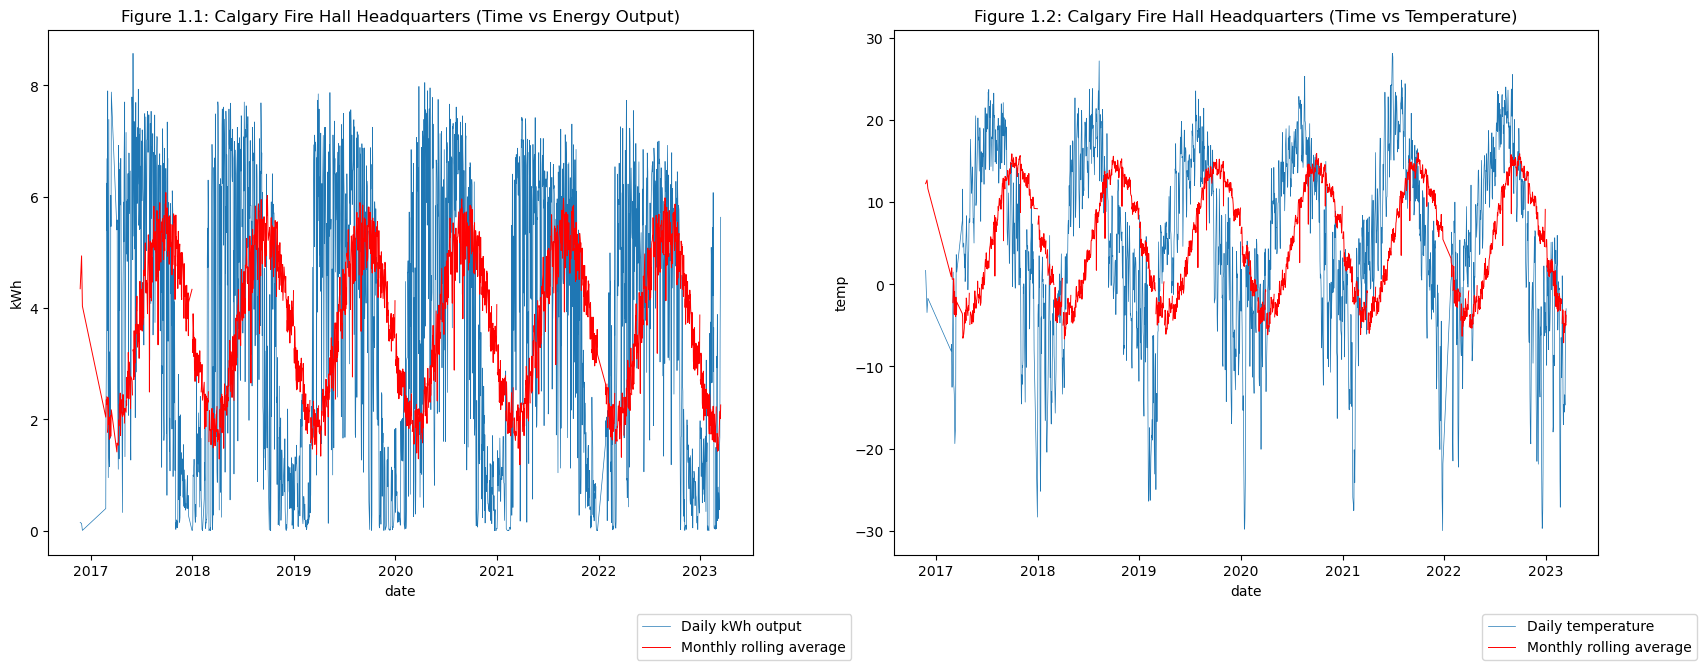

<Figure size 800x200 with 0 Axes>

In [47]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.lineplot(x='date', y='kWh', data=df_assess, linewidth=0.5)
plt.plot(df_assess.date, df_assess.rolling_kWh, linewidth=0.7, color='r')
plt.title('Figure 1.1: Calgary Fire Hall Headquarters (Time vs Energy Output)', size='large',loc='center')
plt.legend(['Daily kWh output', 'Monthly rolling average'], loc='upper right', bbox_to_anchor=(1.15, -0.1))
plt.subplot(2,2,2)
sns.lineplot(x='date', y='temp', data=df_assess, linewidth=0.5)
plt.plot(df_assess.date, df_assess.rolling_temp, linewidth=0.7, color='r')
plt.title('Figure 1.2: Calgary Fire Hall Headquarters (Time vs Temperature)', size='large', loc='center')
plt.legend(['Daily temperature', 'Monthly rolling average'], loc='upper right', bbox_to_anchor=(1.15, -0.1))
plt.show()
plt.clf()

The plot shows that our kWh output and temperature are seasonal increasing in the middle of the year and decreases as it enters and leaves the year. We can infer that our kWh output is correlated to temperature with maximum observations possibly during the summer and minimums are in the winter.

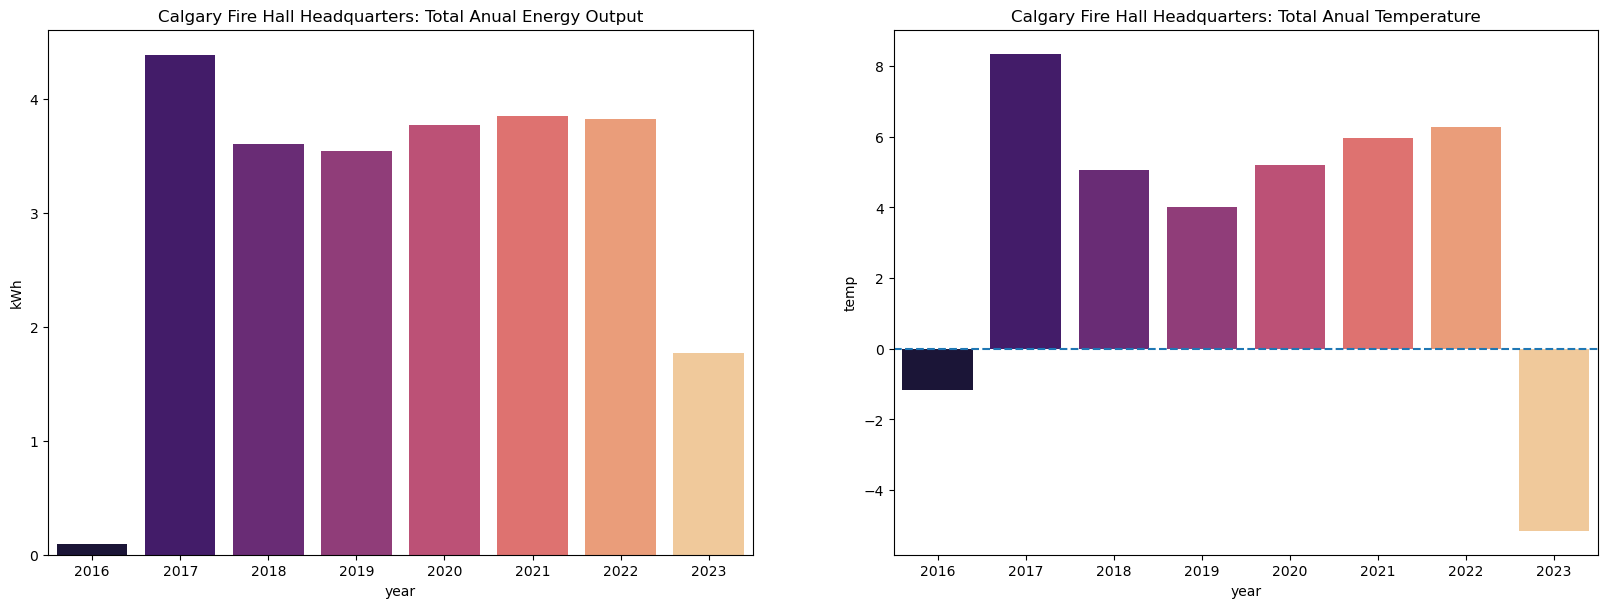

<Figure size 800x200 with 0 Axes>

In [48]:
#plotting the anual energy output and anual temperature
df_assess_sum_kWh = df_assess.groupby('year')['kWh'].mean().reset_index()
df_assess_mean_temp = df_assess.groupby('year')['temp'].mean().reset_index()
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x=df_assess_sum_kWh.year, y=df_assess_sum_kWh.kWh, palette='magma')
plt.title('Calgary Fire Hall Headquarters: Total Anual Energy Output', size='large')
plt.subplot(2,2,2)
sns.barplot(x=df_assess_mean_temp.year, y=df_assess_mean_temp.temp, palette='magma')
plt.axhline(y=0, linestyle='--')
plt.title('Calgary Fire Hall Headquarters: Total Anual Temperature', size='large')
plt.show()
plt.clf()

In [11]:
#count the number of available records per year.
df_assess.year.value_counts()

2020    364
2019    360
2021    358
2018    351
2022    339
2017    268
2023     74
2016      3
Name: year, dtype: int64

In our bar plot, we can observe that 2017 was the year with the highest temperature mean which also corresponds to highest total  energy output even though it has has only 268 recorded observations. This would lead us to another project idea to explore if 2017 was the hottest recorded year.

### Prediction Part 1: SARIMA Forecasting

Based on what we visualized above, we can conclude that our observations are seasonal trend due to the fact that the values are increasing and decreasing at the same time span within the year.

We will be using Seasonal Autoregressive Integrated Moving Average (SARIMA), an algorithm that considers regular difference of the past values to predict future observation.

In [12]:
#creating a new set for date and kwh predict with date as index
df_pred_kWh = df_assess[['date','kWh']]
df_pred_kWh = df_pred_kWh.set_index('date')
# df_pred_kWh_avg = df_pred_kWh['kWh'].resample('MS').mean()
df_pred_temp = df_assess[['date','temp']]
df_pred_temp = df_pred_temp.set_index('date')

In [13]:
from statsmodels.tsa.stattools import adfuller
df_pred_kWh = df_pred_kWh.dropna()
df_pred_temp = df_pred_temp.dropna()
test_result1 = adfuller(df_pred_kWh)

In [14]:
#creating a function for p-value checking and stationarity
def adfuller_test(metric):
    result=adfuller(metric)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [15]:
#checking p-value for kWh
adfuller_test(df_pred_kWh)

ADF Stastistic: -3.605566
p-value: 0.005656
The graph is stationary
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [16]:
#checking p-value for temp and if stationary
adfuller_test(df_pred_temp)

ADF Stastistic: -3.668785
p-value: 0.004574
The graph is stationary
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


The time-series seems to be stationary since our moving average plot in Figure 1.1 & 1.2 and our p-values are less than 0.05 (null hypothesis) therefore, differencing isn't necessary.

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


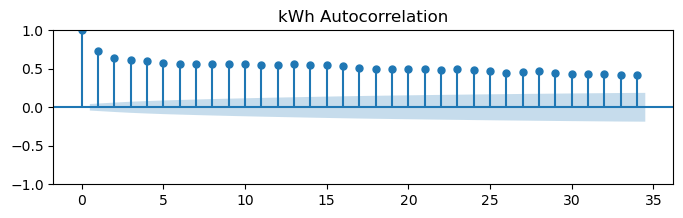

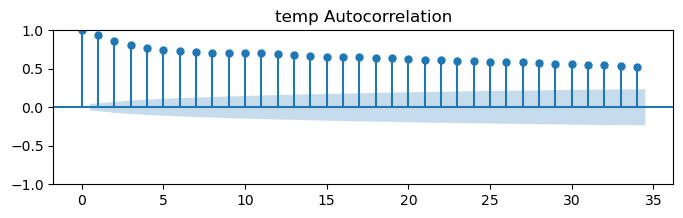

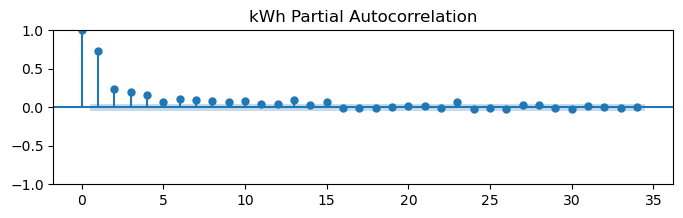

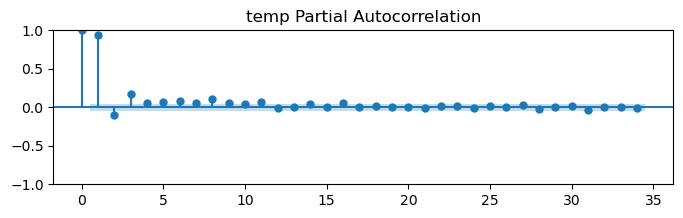

In [18]:
#checking autocorrelation and partial autocorrelation
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rc("figure", figsize=(8,2))
sm.graphics.tsa.plot_acf(df_pred_kWh['kWh'], title= 'kWh Autocorrelation')
sm.graphics.tsa.plot_acf(df_pred_temp['temp'], title= 'temp Autocorrelation')
sm.graphics.tsa.plot_pacf(df_pred_kWh['kWh'], title= 'kWh Partial Autocorrelation')
sm.graphics.tsa.plot_pacf(df_pred_temp['temp'], title= 'temp Partial Autocorrelation')
plt.show()

We will be adding 30 days more to our data set to see the trend of our forecast kWh observation

In [19]:
#adding 30 days more to our data set for prediction
from pandas.tseries.offsets import DateOffset
more_dates=pd.Series([df_pred_kWh.index[-1]+ DateOffset(days=x) for x in range(0,30)])
more_dates=pd.DataFrame(index=more_dates[1:],columns=df_pred_kWh.columns)
df_pred_kWh = future_df= pd.concat([df_pred_kWh,more_dates])

In [20]:
#fitting our SARIMA model
model=sm.tsa.statespace.SARIMAX(df_pred_kWh['kWh'], order=(0,0,2), seasonal_order=(0,0,2,12))
result = model.fit()
model_fit = model.fit(disp=0)
model_fit.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                kWh   No. Observations:                 2146
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -4670.318
Date:                            Sat, 15 Apr 2023   AIC                           9350.635
Time:                                    15:11:22   BIC                           9378.992
Sample:                                         0   HQIC                          9361.010
                                           - 2146                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6580      0.019     35.345      0.000       0.622       0.694
ma.L2          0.3773      0.020     18.957      0.000       0.338       0.416
ma.S.L12       0.4039      0.019     20.853      0.000       0.366       0.442
ma.S.L24       0.3016      0.021     14.621      0.000       0.261       0.342
sigma2         4.8182      0.145     33.198      0.000       4.534       5.103
===================================================================================
Ljung-Box (L1) (Q):                  60.67   Jarque-Bera (JB):                29.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.21
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Actual vs Forecasted Energy Output: 30 Days Ahead'}>

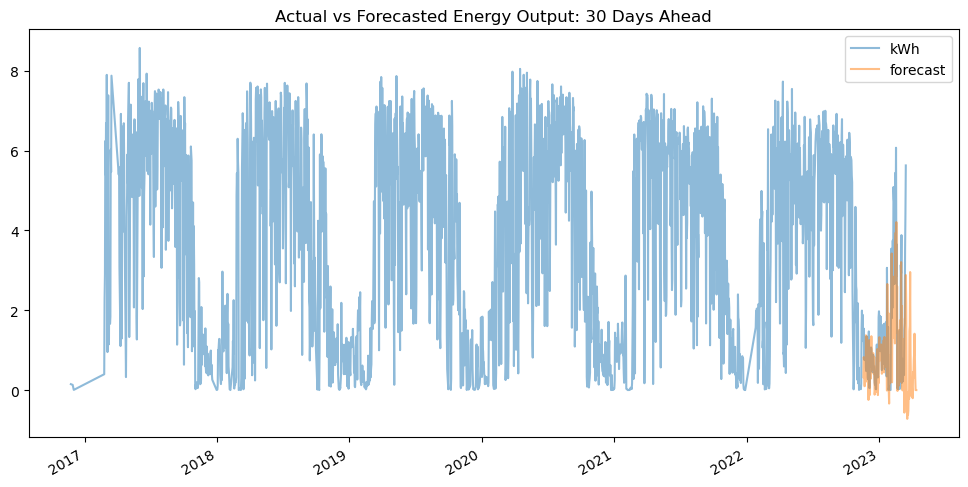

In [21]:
#plotting our forecasted observations together with our actual kWh values
df_pred_kWh['forecast']=result.predict(start=2000)
df_pred_kWh[['kWh','forecast']].plot(figsize=(12,6), alpha=0.5,
                        title='Actual vs Forecasted Energy Output: 30 Days Ahead')

And then we will do same for temperature forecasting.

In [22]:
from pandas.tseries.offsets import DateOffset
add_dates=pd.Series([df_pred_temp.index[-1]+ DateOffset(days=x) for x in range(0,30)])
add_dates=pd.DataFrame(index=add_dates[1:],columns=df_pred_temp.columns)
df_pred_temp = pd.concat([df_pred_temp,add_dates])

In [23]:
model=sm.tsa.statespace.SARIMAX(df_pred_temp['temp'], order=(0,0,2), seasonal_order=(0,0,2,12))
result = model.fit()
model_fit = model.fit(disp=0)
model_fit.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               temp   No. Observations:                 2146
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -6439.131
Date:                            Sat, 15 Apr 2023   AIC                          12888.262
Time:                                    15:11:26   BIC                          12916.619
Sample:                                         0   HQIC                         12898.637
                                           - 2146                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0455      0.018     58.105      0.000       1.010       1.081
ma.L2          0.4838      0.017     28.195      0.000       0.450       0.517
ma.S.L12       0.3990      0.020     19.962      0.000       0.360       0.438
ma.S.L24       0.2465      0.020     12.076      0.000       0.207       0.287
sigma2        25.6226      0.776     33.013      0.000      24.101      27.144
===================================================================================
Ljung-Box (L1) (Q):                  45.08   Jarque-Bera (JB):               318.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.74
Prob(H) (two-sided):                  0.94   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Actual vs Forecasted Temperature: 30 Days Ahead'}>

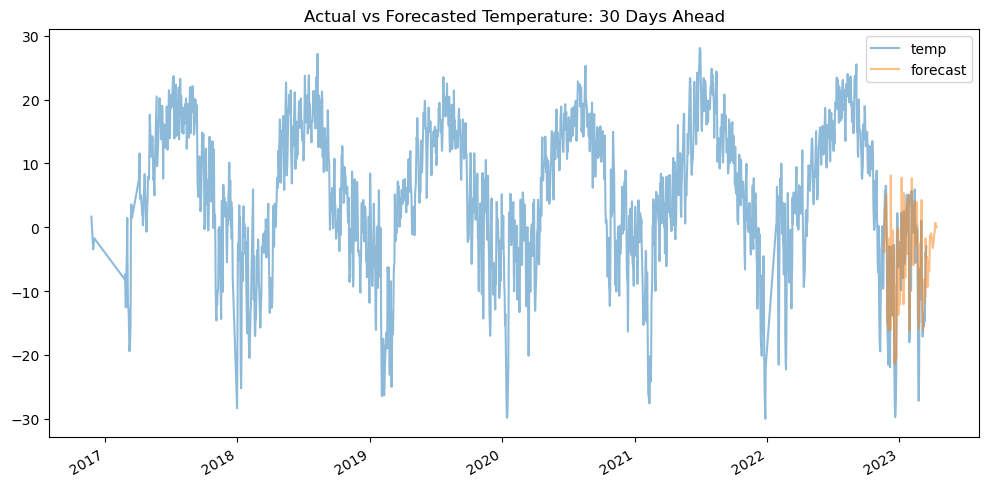

In [24]:
df_pred_temp['forecast']=result.predict(start=2000)
df_pred_temp[['temp','forecast']].plot(figsize=(12,6),alpha=0.5,
                                    title = 'Actual vs Forecasted Temperature: 30 Days Ahead')

The forecasted observations tends to go upwards which also follows the trend of the previous observations.

### Prediction 2: Charging duration using Logistic Growth

Let's assume we have a solar panel system with a maximum capacity of 500 kWh, let us try determine how long would it take to charge this for at least 95% during the the months of rise and fall of temperature, let's consider summer and winter for this.

In this section, we will be applying logistic growth in our analysis to have some expectation for the charging duration due to the fact kWh is not rising linearly with fluctuating values and that the capacity of our solar energy system is decreasing while being charged.

### Logistic Growth
For our logistic growth, we need to solve for the k as the growth rate of our model and see how long will it take for kWh to reach 500.

In [25]:
#Categorizing our seasonal data set.
df_merged['month'] = df_merged.month.astype('int')
df_merged['season']=df_merged.month.apply(lambda count: 'Summer' 
                    if (count >= 6) & (count < 9) else 
                    ('Spring' if (count >= 3) & (count < 6) else
                    ('Fall' if (count >= 9) & (count < 12) else 'Winter')))
df_summer = df_merged[df_merged.season=='Summer']
df_winter = df_merged[df_merged.season=='Winter']
df_fall = df_merged[df_merged.season=='Fall']
df_spring = df_merged[df_merged.season=='Spring']

In [26]:
from scipy.integrate import odeint
#suppose our value increases at a rate of k every 3 days
def growth_rate(data):
    sum = data['kWh'].iloc[3:6].sum()
    sum2 = data['kWh'].iloc[6:9].sum()
    #rate of growth
    k = (np.log((sum2/sum)))/3
    return k

In [27]:
#defining our logistic growth equation
def log_growth(data, season,time):
    y0 = data['kWh'].iloc[0]
    t = np.linspace(0, time, 100)
    t = t.astype('int')
    r = growth_rate(data)
    M = 500
    
    def model(y0, t, r):
        dPdt = r*y0*(1 - y0/M)
        return dPdt
    
    y = odeint(model,y0,t,args=(r,))
    return t, y

Now that we created our logistic growth formula, we will try to observe if our 500 kWh goal can be achieved within 90 days given the difference in temperature per season.

In [28]:
t1, plot1=log_growth(df_summer, 'Summer',90)
t2, plot2=log_growth(df_winter, 'Winter',90)
t3, plot3=log_growth(df_fall, 'Fall',90)
t4, plot4=log_growth(df_spring, 'Spring',90)

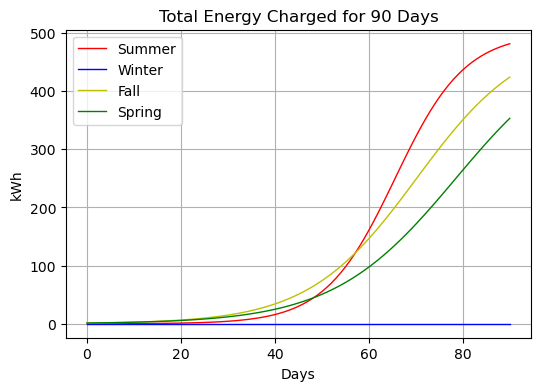

<Figure size 800x200 with 0 Axes>

In [29]:
#plotting 90 days of charging time
plt.figure(figsize=(6,4))
plt.plot(t1,plot1,'r',linewidth=1)
plt.plot(t2,plot2,'b',linewidth=1)
plt.plot(t3,plot3,'y',linewidth=1)
plt.plot(t4,plot4,'g',linewidth=1)
plt.legend(['Summer', 'Winter', 'Fall', 'Spring'])
plt.title('Total Energy Charged for 90 Days')
plt.xlabel('Days')
plt.ylabel('kWh')
plt.grid()
plt.show()
plt.clf()

Duration of charging observations:

a.) 90 days worth of solar energy output during summer will amount to approximately 480kWh

b.) 90 days worth of solar energy output during fall will amount to approximately 420kWh

c.) 90 days worth of solar energy output during spring will amount to approximately 350kWh

d.) 90 days worth of solar energy output during winter seems to be stagnant.

Let's change the number of days to check how long would it take to charge 500kWh per season

In [30]:
t1, plot1=log_growth(df_summer, 'Summer',110)
t2, plot2=log_growth(df_winter, 'Winter',180)
t3, plot3=log_growth(df_fall, 'Fall',130)
t4, plot4=log_growth(df_spring, 'Spring',150)

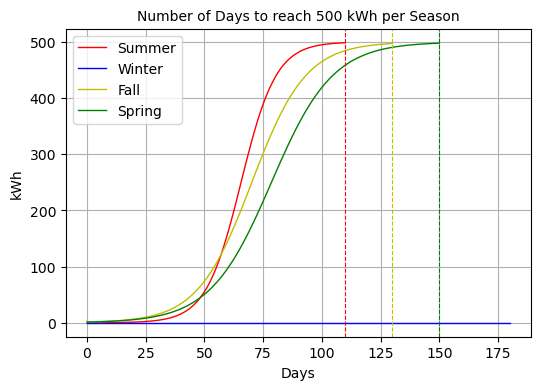

<Figure size 800x200 with 0 Axes>

In [31]:
plt.figure(figsize=(6,4))
plt.plot(t1,plot1,'r',linewidth=1)
plt.plot(t2,plot2,'b',linewidth=1)
plt.plot(t3,plot3,'y',linewidth=1)
plt.plot(t4,plot4,'g',linewidth=1)
plt.legend(['Summer', 'Winter', 'Fall', 'Spring'],loc='upper left')
plt.title('Number of Days to reach 500 kWh per Season', size='medium')
plt.xlabel('Days')
plt.ylabel('kWh')
plt.axvline(x=110, linestyle='--',color='r',linewidth=0.8)
plt.axvline(x=130, linestyle='--',color='y',linewidth=0.8)
plt.axvline(x=150, linestyle='--',color='g',linewidth=0.8)
plt.grid()
plt.show()
plt.clf()

Duration of charging observations:

a.) It would take 110 days to charge 500kWh of solar energy output during summer.

b.) It would take 130 days to charge 500kWh of solar energy output during fall.

c.) It would take 150 days to charge 500kWh of solar energy output during spring.

d.) Winter seems to be pretty stagnant.

### Prediction 3: Linear Regression for kWh output based on current temperature

We will be applying linear regression to predict the kWh output of the solar energy production based on temperature in case we want to have an expected value for daily weather.

In [32]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [33]:
#creating our test and train values
x =np.array(df_assess['temp']).reshape(-1, 1)
y =np.array(df_assess['kWh']).reshape(-1, 1)
# Fit model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 0)
#Setting our model as linear regression and fitting our train set to our model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
#calculating our coefficients
c = model.coef_
i = model.intercept_

print('Coefficients:', c, '\nIntercept:', i)

Coefficients: [[0.1602177]] 
Intercept: [2.93125503]


With the values shown above, the predictive mathematical syntax would be: 

<b>y = 0.1602177x1 + 2.93125503</b>

Moving forward, let us try to predict our values in our training set and compare.

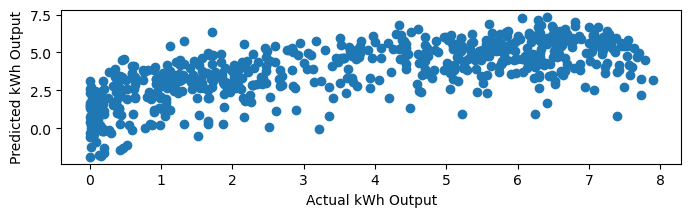

In [35]:
#plotting the actual and predicted values
y_pred_test= model.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual kWh Output')
plt.ylabel('Predicted kWh Output')
plt.show()

In [36]:
mean_absolute_error(y_test, y_pred_test)

1.5062382940342383

This number shows the average absolute error we have compared to the values in our data.

Lastly, for our checking, we need to find the R-squared score to determine how good our model in predicting our insurance charge.

In [37]:
r2_score(y_test, y_pred_test)

0.470542930770272

This explains that 47% of our regression model or our mathematical syntax fits the data set and explain the variations in our variables.

Now let's try to predict some random average hourly temperatures

In [38]:
#kWh output at a given average hourly temperature
print(model.predict(np.array([[29]])))
print(model.predict(np.array([[13]])))
print(model.predict(np.array([[6]])))

[[7.57756845]]
[[5.01408518]]
[[3.89256126]]


These value corresponds to the following:

a.) At 29 average hourly temperature, we can expect 7.57756845 kWh output.

b.) At 13 average hourly temperature, we can expect 5.01408518 kWh output

c.) At 6 average hourly temperature, we can expect 3.89256126 kWh output